In [1]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

dataPath = 'C:/Users/zhang/mine/finTech/2021/data/A'

trainDf = pd.read_csv(dataPath + '/train_v1.csv')
wkdDf = pd.read_csv(dataPath + '/wkd_v1.csv')
testDf = pd.read_csv(dataPath + '/test_v1_periods.csv')
testDayDf = pd.read_csv(dataPath + '/test_v1_day.csv')

wkdDf = wkdDf.rename(columns={'ORIG_DT':'date'})

In [2]:
trainDf.head()

,date,post_id,biz_type,periods,amount
0,2018/1/1,A,A1,1,0
1,2018/1/1,A,A1,2,0
2,2018/1/1,A,A1,3,0
3,2018/1/1,A,A1,4,0
4,2018/1/1,A,A1,5,0


In [3]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695520 entries, 0 to 695519
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      695520 non-null  object
 1   post_id   695520 non-null  object
 2   biz_type  695520 non-null  object
 3   periods   695520 non-null  int64 
 4   amount    695520 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 26.5+ MB


In [4]:
wkdDf.head()

,date,WKD_TYP_CD
0,2018/1/1,NH
1,2018/1/2,WN
2,2018/1/3,WN
3,2018/1/4,WN
4,2018/1/5,WN


In [5]:
wkdDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1461 non-null   object
 1   WKD_TYP_CD  1461 non-null   object
dtypes: object(2)
memory usage: 23.0+ KB


In [2]:
trainDf = trainDf.merge(wkdDf, on = ['date'], how = 'left')

testDf = testDf.merge(wkdDf, on = ['date'], how = 'left')

trainDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695520 entries, 0 to 695519
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        695520 non-null  object
 1   post_id     695520 non-null  object
 2   biz_type    695520 non-null  object
 3   periods     695520 non-null  int64 
 4   amount      695520 non-null  int64 
 5   WKD_TYP_CD  695520 non-null  object
dtypes: int64(2), object(4)
memory usage: 37.1+ MB


In [7]:
trainDf.head()

,date,post_id,biz_type,periods,amount,WKD_TYP_CD
0,2018/1/1,A,A1,1,0,NH
1,2018/1/1,A,A1,2,0,NH
2,2018/1/1,A,A1,3,0,NH
3,2018/1/1,A,A1,4,0,NH
4,2018/1/1,A,A1,5,0,NH


In [8]:
trainDf[trainDf['amount']>0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217806 entries, 66 to 695458
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        217806 non-null  object
 1   post_id     217806 non-null  object
 2   biz_type    217806 non-null  object
 3   periods     217806 non-null  int64 
 4   amount      217806 non-null  int64 
 5   WKD_TYP_CD  217806 non-null  object
dtypes: int64(2), object(4)
memory usage: 11.6+ MB


In [9]:
trainDf.describe(include = 'all')

,date,post_id,biz_type,periods,amount,WKD_TYP_CD
count,695520,695520,695520,695520.000000,695520.000000,695520
unique,1035,2,14,NaN,NaN,5
top,2020/5/6,A,A8,NaN,NaN,WN
freq,672,645840,49680,NaN,NaN,460992
mean,NaN,NaN,NaN,24.500000,30.055817,NaN
std,NaN,NaN,NaN,13.853409,115.534903,NaN
min,NaN,NaN,NaN,1.000000,0.000000,NaN
25%,NaN,NaN,NaN,12.750000,0.000000,NaN
50%,NaN,NaN,NaN,24.500000,0.000000,NaN
75%,NaN,NaN,NaN,36.250000,4.000000,NaN


In [3]:
## 提取岗位的业务量
def get_jobAmount(df):
    outputDf = df.groupby(['date', 'post_id', 'periods', 'WKD_TYP_CD'], as_index = False)['amount'].sum()
    return outputDf

In [4]:
trainJobDf = get_jobAmount(trainDf)
trainJobDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99360 entries, 0 to 99359
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        99360 non-null  object
 1   post_id     99360 non-null  object
 2   periods     99360 non-null  int64 
 3   WKD_TYP_CD  99360 non-null  object
 4   amount      99360 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 4.5+ MB


In [21]:
trainJobDf.head()

,date,post_id,periods,WKD_TYP_CD,amount
0,2018/1/1,A,1,NH,0
1,2018/1/1,A,2,NH,0
2,2018/1/1,A,3,NH,0
3,2018/1/1,A,4,NH,0
4,2018/1/1,A,5,NH,0


In [22]:
trainDf[trainDf['amount']>0].head()

,date,post_id,biz_type,periods,amount,WKD_TYP_CD
66,2018/1/2,A,A1,19,2,WN
67,2018/1/2,A,A1,20,1,WN
68,2018/1/2,A,A1,21,6,WN
69,2018/1/2,A,A1,22,9,WN
70,2018/1/2,A,A1,23,7,WN


In [24]:
trainJobDf[trainJobDf['amount']>0].head()

,date,post_id,periods,WKD_TYP_CD,amount
16,2018/1/1,A,17,NH,1
17,2018/1/1,A,18,NH,27
18,2018/1/1,A,19,NH,274
19,2018/1/1,A,20,NH,424
20,2018/1/1,A,21,NH,677


In [5]:
## 提取时间特征，此处以年、月、日作为变量
def getDateDf(df):
    df['date'] = pd.to_datetime(df['date'], format = '%Y/%m/%d')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    return df

In [6]:
trainJobDf = getDateDf(trainJobDf)
testDf = getDateDf(testDf)
trainJobDf.head()


,date,post_id,periods,WKD_TYP_CD,amount,year,month,day
0,2018-01-01,A,1,NH,0,2018,1,1
1,2018-01-01,A,2,NH,0,2018,1,1
2,2018-01-01,A,3,NH,0,2018,1,1
3,2018-01-01,A,4,NH,0,2018,1,1
4,2018-01-01,A,5,NH,0,2018,1,1


# 一些预测尝试

In [7]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.linear_model import LinearRegression,LassoCV,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import KFold,train_test_split,StratifiedKFold,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score, \
                            precision_score,recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
def labelEncoder_df(df, features):
    for i in features:
        encoder = LabelEncoder()
        df[i] = encoder.fit_transform(df[i])

In [9]:
order = ['year', 'month', 'day', 'post_id', 'periods', 'WKD_TYP_CD', 'amount']
trainDf = trainJobDf.drop(['date'], axis = 1)
trainDF = trainDf[order]

testDf.drop(['date'], axis = 1, inplace = True)
trainDf.head()

,post_id,periods,WKD_TYP_CD,amount,year,month,day
0,A,1,NH,0,2018,1,1
1,A,2,NH,0,2018,1,1
2,A,3,NH,0,2018,1,1
3,A,4,NH,0,2018,1,1
4,A,5,NH,0,2018,1,1


In [12]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99360 entries, 0 to 99359
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   post_id     99360 non-null  object
 1   periods     99360 non-null  int64 
 2   WKD_TYP_CD  99360 non-null  object
 3   amount      99360 non-null  int64 
 4   year        99360 non-null  int64 
 5   month       99360 non-null  int64 
 6   day         99360 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 6.1+ MB


In [10]:
trainDf['isTest'] = -1
testDf['isTest'] = 1
totalDf = pd.concat([trainDf, testDf])

In [11]:
## 节省内存
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [12]:
totalDf = reduce_mem_usage(totalDf)

Mem. usage decreased to  3.12 Mb (55.6% reduction)


In [13]:
totalDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102240 entries, 0 to 2879
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   post_id     102240 non-null  object 
 1   periods     102240 non-null  int8   
 2   WKD_TYP_CD  102240 non-null  object 
 3   amount      99360 non-null   float16
 4   year        102240 non-null  int16  
 5   month       102240 non-null  int8   
 6   day         102240 non-null  int8   
 7   isTest      102240 non-null  int8   
dtypes: float16(1), int16(1), int8(4), object(2)
memory usage: 3.1+ MB


In [13]:
cols = ['post_id', 'WKD_TYP_CD']
for col in cols:
    if totalDf[col].dtype == 'object':
        totalDf[col] = totalDf[col].astype(str)
labelEncoder_df(totalDf, cols)

In [14]:
testCols = testDf.columns.tolist()
testCols

['post_id',
 'periods',
 'amount',
 'WKD_TYP_CD',
 'year',
 'month',
 'day',
 'isTest']

In [15]:
trainDf = totalDf[totalDf['isTest'] == -1]
trainDf.drop(['isTest'], axis = 1, inplace = True)
testDf = totalDf[totalDf['isTest'] == 1]
testDf = testDf[testCols]
testDf.drop(['isTest'], axis = 1, inplace = True)

In [23]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99360 entries, 0 to 99359
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   post_id     99360 non-null  int32  
 1   periods     99360 non-null  int8   
 2   WKD_TYP_CD  99360 non-null  int32  
 3   amount      99360 non-null  float16
 4   year        99360 non-null  int16  
 5   month       99360 non-null  int8   
 6   day         99360 non-null  int8   
dtypes: float16(1), int16(1), int32(2), int8(3)
memory usage: 2.2 MB


In [26]:
trainDf.head()

,post_id,periods,WKD_TYP_CD,amount,year,month,day
0,0,1,0,0.0,2018,1,1
1,0,2,0,0.0,2018,1,1
2,0,3,0,0.0,2018,1,1
3,0,4,0,0.0,2018,1,1
4,0,5,0,0.0,2018,1,1


In [16]:
trainDf['amount'] = trainDf['amount'].astype(int)

In [17]:
trainDf = reduce_mem_usage(trainDf)
testDf = reduce_mem_usage(testDf)

Mem. usage decreased to  1.61 Mb (32.0% reduction)
Mem. usage decreased to  0.06 Mb (0.0% reduction)


In [29]:
trainDf.head()

,post_id,periods,WKD_TYP_CD,amount,year,month,day
0,0,1,0,0,2018,1,1
1,0,2,0,0,2018,1,1
2,0,3,0,0,2018,1,1
3,0,4,0,0,2018,1,1
4,0,5,0,0,2018,1,1


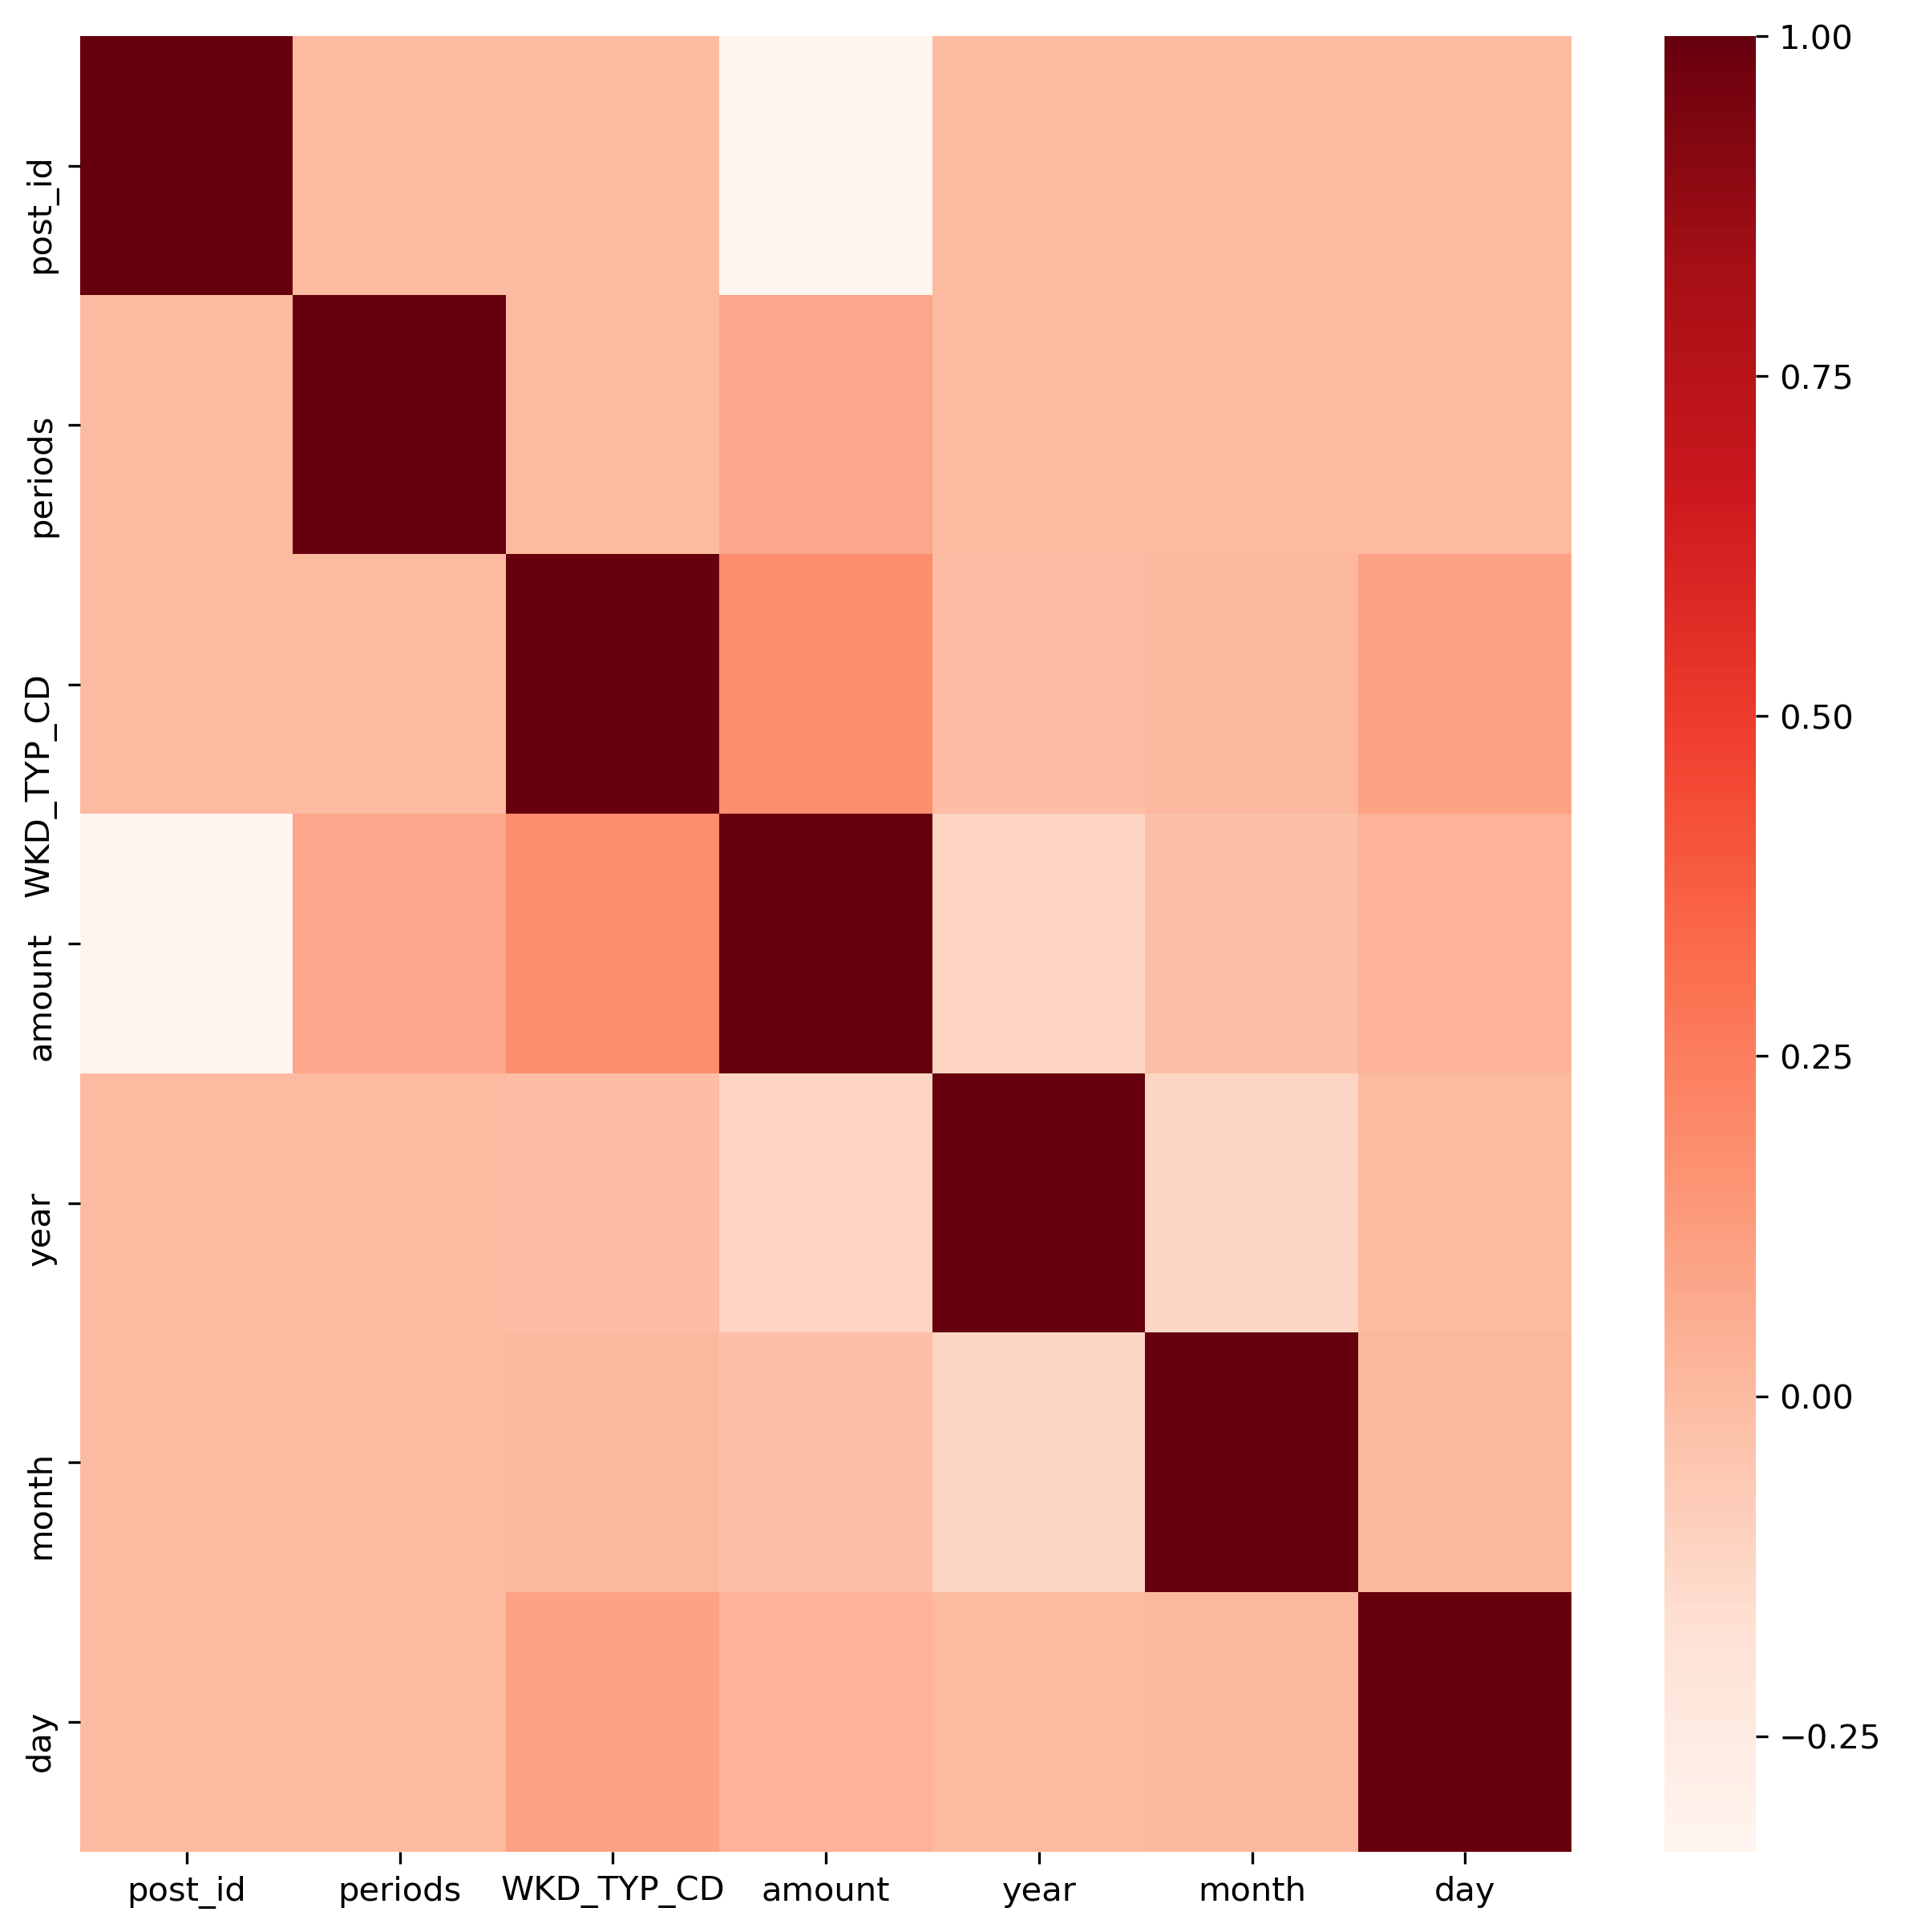

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (10, 10), dpi = 300)
sns.heatmap(trainDf.corr(), cmap = 'Reds', annot = False) # temp.drop(['id'], axis = 1)
plt.show()

# 预测

In [18]:
dfX = trainDf.drop(['amount'], axis = 1)
dfY = trainDf['amount']

trainX, valX, trainY, valY = train_test_split(dfX, dfY, test_size=0.2)    # random_state=42

In [19]:
################
## 评价函数 
def calMAPE(y, y_predict, name=None):
    y = y.to_numpy()
    temp = np.abs((y - y_predict) / y)
    temp = temp[~np.isinf(temp)]
    MAPE = np.nanmean(temp, axis=0)
    # MAPE = np.mean(np.abs((y - y_predict) / y)) * 100
    if name:
        print(name,':')
    print(f'MAPE is: {MAPE}')
    print('- - - - - - ')
    return MAPE

In [20]:
random_seed = 2020
np.random.seed(2)
    
rf_cfl = RandomForestRegressor()

rf_cfl.fit(trainX, trainY)
y_rf = rf_cfl.predict(valX)

In [21]:
print("Train Score:%f" % rf_cfl.score(trainX, trainY))
print("Val Score:%f" % rf_cfl.score(valX, valY))

Train Score:0.997908
Val Score:0.988764


In [22]:
y_rf = y_rf.astype(int)

In [23]:
max(y_rf)

3248

In [24]:
max(valY)

3944

In [25]:
MAPE = calMAPE(valY, y_rf)
print(MAPE)

MAPE is: 0.347319733670327
- - - - - - 
0.347319733670327
